## Escuela de Ingeniería en Computación, ITCR

## Aprendizaje automático


### Quiz 02


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ).

Modo de trabajo: Individual

Estudiante: Gabriel Valentine Fonseca

---

Resumen: En el presente quiz se realizarán ejercicios para repasar algunos conceptos sobre proyectos de clasificación binaria utilizando Python y PyTorch.

---



**Ejercicio. Realice un análisis comparativo de resultados de clasificación binaria utilizando los algoritmos perceptrón multicapa, árboles de decisión y bosques aleatorios**

Se le proporciona el archivo diabetes.csv, en el cual las primeras 8 columnas corresponden a $X$ y la última columna a $y$ ---o atributo de clase (Outcome)---.

***Datos para el ejercicio***
* Fuente: https://www.kaggle.com/uciml/pima-indians-diabetes-database
* Descripción textual:
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Columns:
    * Pregnancies: Number of times pregnant
    * Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    * BloodPressure: Diastolic blood pressure
    * SkinThickness: Triceps skin fold thickness
    * Insulin: 2-Hour serum insulin
    * BMI: Body mass index
    * DiabetesPedigreeFunction: Diabetes pedigree function
    * Age: Age
    * Outcome: Class variable (0 or 1)

---

In [103]:
import torch as torch
import torch.optim as optim
import torch.nn as nn

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor


**1. Preprocesamiento**
- a) (1 punto) Describa el conjunto de datos y referencie la fuente.


El conjunto de datos utilizado es el "Pima Indians Diabetes Database" disponible en Kaggle. Este consiste en variables predictoras médicas e incluye información sobre mujeres de ascendencia Pima (una tribu nativa americana en Arizona, Estados Unidos) que fueron sometidas a pruebas para detectar la diabetes.\

Fuente:
UCI Machine Learning Repository. (s.f.). Pima Indians Diabetes Database. Kaggle.Recuperado de: https://www.kaggle.com/uciml/pima-indians-diabetes-database


- b) Cargue el conjunto de datos.


In [31]:
#cargar los datos de google drive
from google.colab import drive
drive.mount('/content/drive')
archivo = '/content/drive/MyDrive/Colab Notebooks/Módulo 2/Quices/Quiz 2. Árboles de decisión/diabetes.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



- c) (2 puntos) Explore el conjunto de datos, visualice algunas estadísticas, limpie el conjunto de datos y verifique que no existan valores faltantes.


In [98]:
#Ver las primeras filas del df
df = pd.read_csv(archivo, header = 0, delimiter =',')
colNames = df.columns
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



- d) (2 puntos) Escale los datos.

In [99]:


scaled_df = pd.DataFrame(preprocessing.scale(df), columns=df.columns)

df.iloc[:, :] = scaled_df.values

print('Datos escalados')
df.std(axis=0)

Datos escalados


Pregnancies                 1.000652
Glucose                     1.000652
BloodPressure               1.000652
SkinThickness               1.000652
Insulin                     1.000652
BMI                         1.000652
DiabetesPedigreeFunction    1.000652
Age                         1.000652
Outcome                     1.000652
dtype: float64


- e) (1 punto) Separe los datos en datos de entrenamiento y evaluación (80/20% respectivamente).

In [100]:

# Se dividen los datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)

**2. Generación y evaluación de modelos**

**Árboles de decisión**
- f) (2 puntos) Utilice árboles de decisión para resolver el problema de clasificación binaria.


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 5)

model.fit(X_train, y_train)

# se guardan las predicciones
Y_pred = model.predict(X_test)

Y_pred

array([ 0.15881814, -0.56015167, -0.73212021, -0.73212021, -0.73212021,
        0.15881814, -0.73212021,  0.8244724 ,  0.5888529 ,  0.5888529 ,
        0.15881814,  0.91632103,  1.36589591,  0.8244724 , -0.73212021,
       -0.176763  , -0.56015167, -0.73212021,  0.14205317,  0.05463584,
        0.15881814, -0.58742944,  0.15881814, -0.56015167,  0.5888529 ,
        1.36589591, -0.73212021, -0.73212021, -0.56015167, -0.58742944,
        0.05463584,  1.04801468,  0.91632103,  1.36589591,  0.8244724 ,
        1.04801468,  1.36589591,  0.8244724 ,  0.15881814,  1.36589591,
       -0.73212021,  1.36589591,  0.8244724 ,  0.15881814, -0.73212021,
        0.05463584,  0.8244724 , -0.56015167, -0.73212021,  1.36589591,
       -0.73212021,  1.04801468,  1.04801468, -0.36188207, -0.73212021,
       -0.73212021, -0.73212021, -0.73212021, -0.176763  ,  0.91632103,
        1.04801468, -0.56015167, -0.36188207, -0.58742944, -0.56015167,
        0.05463584, -0.73212021,  0.5888529 , -0.73212021,  1.36

- g) (2 puntos) Utilice validación cruzada para evaluar la exactitud (accuracy) del modelo.


In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
accuracy_avg = np.mean(scores)

print("Exactitud promedio del modelo:", accuracy_avg)

Exactitud promedio del modelo: 0.17546904878772357



- h) (5 puntos) Realice el ejercicio con al menos 5 niveles diferentes de profundidad de árboles (max_depth) y recomiende cuál es la mejor configuración para este parámetro.


In [71]:
#se crea un iterador para recorrer cada nivel de profundidad

depths = [6, 10, 15, 20, 25]
best_depth = 0
r2 = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    r2_store = cross_val_score(model, X, y, cv=5, scoring='r2')
    r2_avg = np.mean(r2_store)
    r2.append(r2_avg)

best_r2_score = r2[0]
best_depth = depths[0]

for i in range(1, len(r2)):
    if r2[i] > best_r2_score:
        best_r2_score = r2[i]
        best_depth = depths[i]

print("Mejor nivel de profundidad:", best_depth)
print("R² = ", best_r2_score)



Mejor nivel de profundidad: 6
R² =  0.0697400606165123



- i) (3 puntos) Imprima el árbol con la profundidad que genera el mejor desempeño, explique la estructura del árbol (sobre todo qué significan las hojas) y clasifique la siguiente muestra (0, 118, 84, 47, 230, 45.8, 0.551, 31) explique la ruta que siguió en el árbol y el resultado obtenido. Los datos corresponden a las siguientes características (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age).

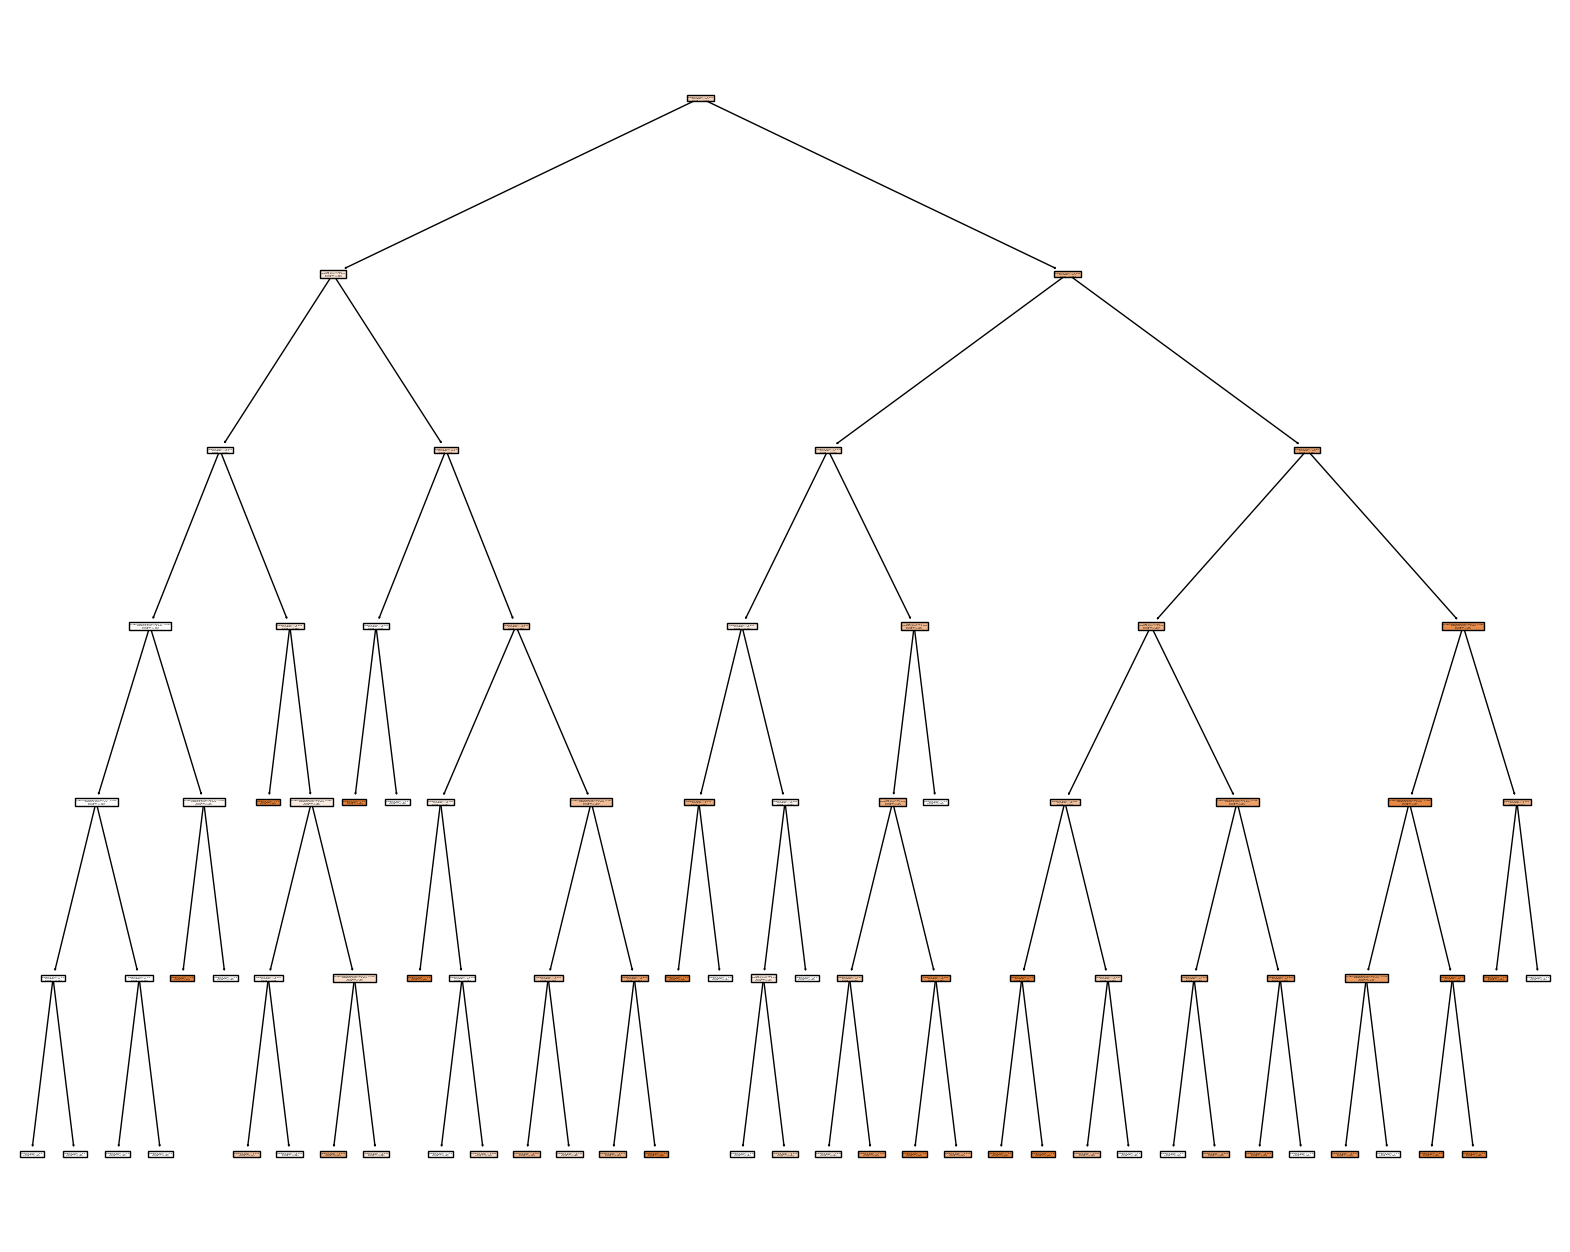

Resultado de la clasificación: [1.36589591]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [78]:
#Se entrena el modelo que la profundidad que general el mejor desempeno
model = DecisionTreeRegressor(max_depth=6)
model.fit(X_train, y_train)

# Se crea la figura del arbol
plt.figure(figsize=(20, 16))
tree.plot_tree(model, feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], filled=True)
plt.show()

muestra = [[0, 118, 84, 47, 230, 45.8, 0.551, 31]]
prediction = model.predict(muestra)

print("Resultado de la clasificación:", prediction)


**Random Forest**
- j) (2 puntos) Aplique el algoritmo de Random Forest al ejercicio de clasificación binaria.


In [81]:
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
     random_state=0)

model = DecisionTreeClassifier(max_depth=None, random_state=0)
scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())

model = RandomForestClassifier(n_estimators=50, max_depth=None,
     min_samples_split=2, random_state=0)
scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())

0.9823000000000001
1.0


- k) (2 puntos) Utilice validación cruzada para evaluar la exactitud (accuracy) del modelo.


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, random_state=42)
model = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Calcula y muestra la exactitud promedio
mean_accuracy = np.mean(scores)
print("Exactitud promedio (R2):", mean_accuracy)

Exactitud promedio (R2): 0.841050647879943


- l) (5 puntos) Realice el ejercicio con al menos 5 cantidades diferentes de estimadores (n_estimators) y recomiende cuál es la mejor configuración para este parámetro.

In [85]:
#Aplicando el mismo modelo con un iterador que recorra 5 estimadores

n_estimators_list = [50, 100, 150, 200, 250]
scores_stor = {}

for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n_estimators)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_r2_score = np.mean(scores)
    scores_stor[n_estimators] = mean_r2_score

best_n_estimators = max(scores_stor, key=scores_stor.get)
best_r2_score = scores_stor[best_n_estimators]

print("Mejor número de estimadores:", best_n_estimators)
print("Coeficiente de determinación R² correspondiente:", best_r2_score)


Mejor número de estimadores: 250
Coeficiente de determinación R² correspondiente: 0.841435609631314


**(10% extra) Perceptron multicapa con PyTorch**
- m) (5%) Defina un modelo utilizando una **red profunda de perceptrón multicapa** implementada con PyTorch.
- n) (3%) Realice el entrenamiento del modelo. Aún no vamos a utilizar la curva de error para ajustar las épocas del entrenamiento del modelo apropiadamente por lo que inicialmente pueden usar un valor que ustedes consideren conveniente.
- ñ)(1%) Calcule la exactitud (accuracy) del modelo.
- o) (1%) Clasifique la siguiente muestra (0, 118, 84, 47, 230, 45.8, 0.551, 31). Los datos corresponden a las siguientes características (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age).

In [112]:
#Se define el modelo perceptron

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


input_size = X_train.shape[1]
hidden_size = 64
output_size = 1


model = MLP(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [113]:
# Se convierten los datos a tensores pytorch
X_train_array = X_train.values
y_train_array = y_train.values

X_train_tensor = torch.tensor(X_train_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32)

num_epochs = 100

# Entrenamiento del modelo
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


#Se aplica el modelo y se calcula y su precision

X, y = make_regression(n_samples=1000, n_features=10, random_state=42)
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam')
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

mean_accuracy = np.mean(scores)
print("R2 promedio =:", mean_accuracy)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([614])) that is different to the input size (torch.Size([614, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

R2 promedio =: 0.9985174491071085


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [114]:
# Se le de forma al modelo
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam')

model.fit(X_train_array, y_train_array)

# Se define la muestra y se aplica el modelo
sample = np.array([[0, 118, 84, 47, 230, 45.8, 0.551, 31]])

prediction = model.predict(sample)

print("Prediccion:", prediction)

Prediccion: [141.25570256]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**3. Análisis comparativo de resultados**

 p) (4 puntos) Genere al menos cuatro conclusiones al respecto de los resultados del ejercicio (incluya comparaciones de resultados entre modelos).

-Árbol de Decisiones: Tiene la precisión más baja, alrededor del 7%. No es muy confiable y podría necesitar ajustes para mejorar.

-Perceptrón Multicapa: Es el ganador con una precisión muy alta, alrededor del 99.8%. Puede predecir con gran precisión si la persona tiene diabetes o no, basándose en las características proporcionadas.

-Random Forest: Tiene una precisión bastante alta, cerca del 84%. Aunque es un poco menos preciso que perceptron, sigue siendo confiable y útil en la detección de diabetes.

-Por lo tanto, el Perceptrón Multicapa es el más preciso y confiable, seguido de cerca por Random Forest. El Árbol de Decisiones muestra una precisión considerablemente inferior. Sin embargo, la precisión no es el único criterio a considerar al elegir un modelo. Otros factores como el costo computacional, la interpretación y la escalabilidad también son importantes para tomar una decisión informada sobre qué modelo utilizar.